# Data Processes

## 2nd Assignment

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print('Please enter the path to your input data.')
path = input()
print('Input data taken from ' + path)

Please enter path to input data.
/content/drive/My Drive/Data Processes/data.csv
Input data taken from /content/drive/My Drive/Data Processes/data.csv


In [ ]:
# ToDo: Delete this cell for final delivery!!!!!!!!

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Data Processes/data.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)
print(df)

       quality  bits  intra_parts  ...    cost_1    cost_2  relevant
0           22  2143            0  ...       0.0       0.0       1.0
1           22  1735            0  ...    8816.0    8801.0       1.0
2           22  1971            0  ...    5104.0    5193.0       1.0
3           22  2473            0  ...   21531.0   19802.0       1.0
4           22  1093            0  ...   15073.0   14549.0       1.0
...        ...   ...          ...  ...       ...       ...       ...
15995       37    66           16  ...   18704.0   18283.0       1.0
15996       37   100           32  ...   41738.0   37212.0       1.0
15997       37   141           16  ...   20642.0   17046.0       1.0
15998       37   335           16  ...  125078.0  146935.0       1.0
15999       37   226           32  ...  171759.0  184325.0       1.0

[16000 rows x 27 columns]


## Data exploration


In [ ]:
nas = pd.isna(df) 
nas = pd.Series(nas.sum(axis=1))
pd.set_option('display.max_columns', None)

# Counting nans.
print("Number of nans", df.isna().sum())

#examine all the entries that have some of their values nan
entries_with_nans = df[df.isna().any(axis=1)]
#entries_with_nans

Number of nans quality               0
bits                  0
intra_parts           0
skip_parts            0
inter_16x16_parts     0
inter_4x4_parts       0
inter_other_parts     0
non_zero_pixels       0
frame_width           0
frame_height          0
movement_level        0
mean                  0
sub_mean_1            0
sub_mean_2            0
sub_mean_3           14
sub_mean_4            0
var_sub_blocks        0
sobel_h               0
sobel_v               0
variance              0
block_movement_h      0
block_movement_v      0
var_movement_h        0
var_movement_v        0
cost_1                0
cost_2               17
relevant              2
dtype: int64


block_movement_h     0.009136
inter_16x16_parts    0.010243
var_movement_v       0.015649
var_movement_h       0.016549
mean                 0.028971
var_sub_blocks       0.054598
block_movement_v     0.067436
cost_2               0.075446
intra_parts          0.075806
cost_1               0.079386
movement_level       0.085982
variance             0.102842
inter_4x4_parts      0.114044
frame_height         0.137324
sub_mean_2           0.138525
sub_mean_1           0.141184
frame_width          0.148213
sub_mean_3           0.151905
sub_mean_4           0.179225
sobel_h              0.194505
inter_other_parts    0.195646
sobel_v              0.197248
non_zero_pixels      0.236884
skip_parts           0.241371
quality              0.250797
bits                 0.252393
relevant             1.000000
Name: relevant, dtype: float64

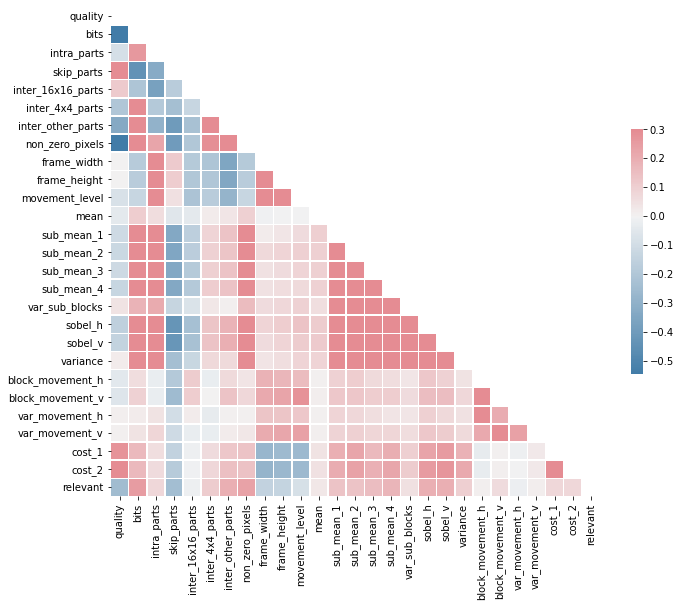

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
#sort by the absolute values of the correlation of 'relevant' variable with others
corr_relevant = corr.abs().sort_values('relevant')['relevant']

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#print the correlation coefficient of the 'relevant' variable with others, sorted
corr_relevant

In [ ]:
!pip install pingouin

     |████████████████████████████████| 225kB 5.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=682b454e80479b69c6ded6856215c275c2186a5b56c6032aad4dbd6a96408373
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=c2fb0cbfb2e2c23c16a3310210ef7cf06212bc673d55dc5d13b6744abc61f958
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=d239d7c9c357d28b4f9d6f89efb0b5ee091b5cfd6fc072486882ed59c15c1f0f
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


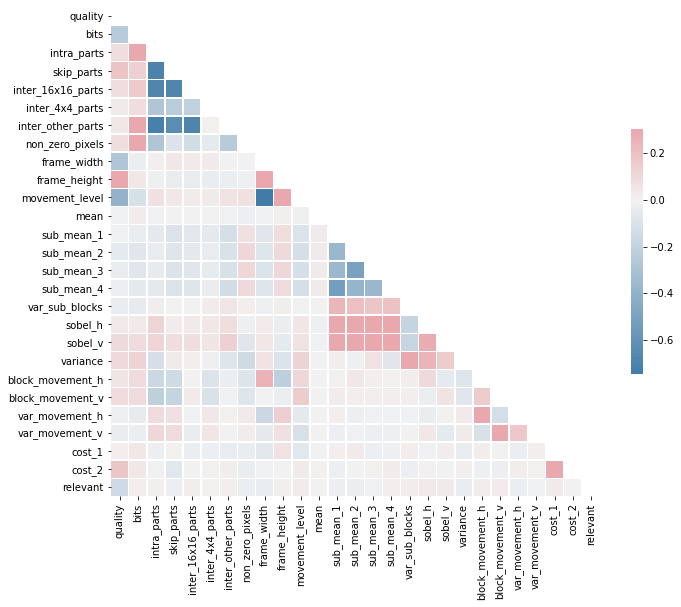

In [ ]:
import pingouin as pg
pcorr = df.pcorr().round(3)

#sort by the absolute values of the correlation of 'relevant' variable with others
pcorr_relevant = pcorr.abs().sort_values('relevant')['relevant']

mask = np.triu(np.ones_like(pcorr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240,10, as_cmap=True)
sns.heatmap(pcorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#pcorr_relevant

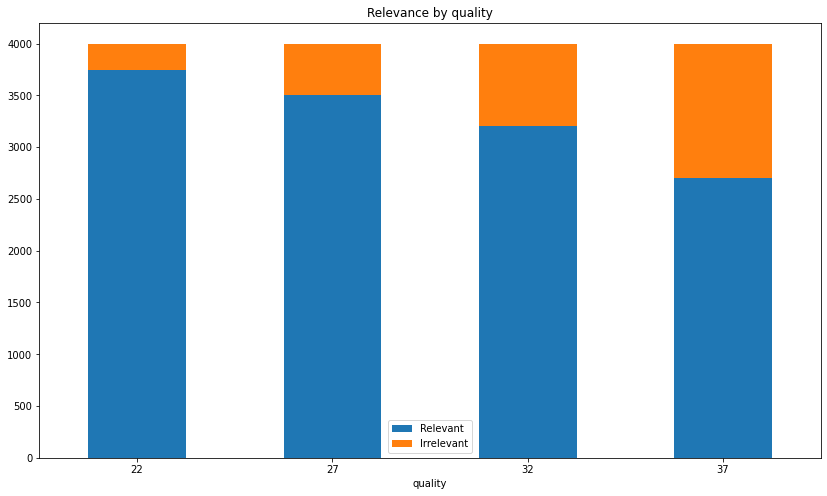

In [ ]:
import matplotlib.pyplot as plt

no_of_relevants = df.groupby(['quality'])['relevant'].sum()
no_of_irrelevants = df.groupby(['quality'])['relevant'].count() - no_of_relevants


#create dictonary 
data = {"Relevant": no_of_relevants, 
        "Irrelevant": no_of_irrelevants } 
  
df_groups = pd.concat(data,  axis = 1) 
  
f, ax = plt.subplots(1, 1, figsize = (14, 8))
df_groups.plot.bar(stacked=True,rot=0, title="Relevance by quality", align="center", ax=ax);

plt.show(block=True);


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


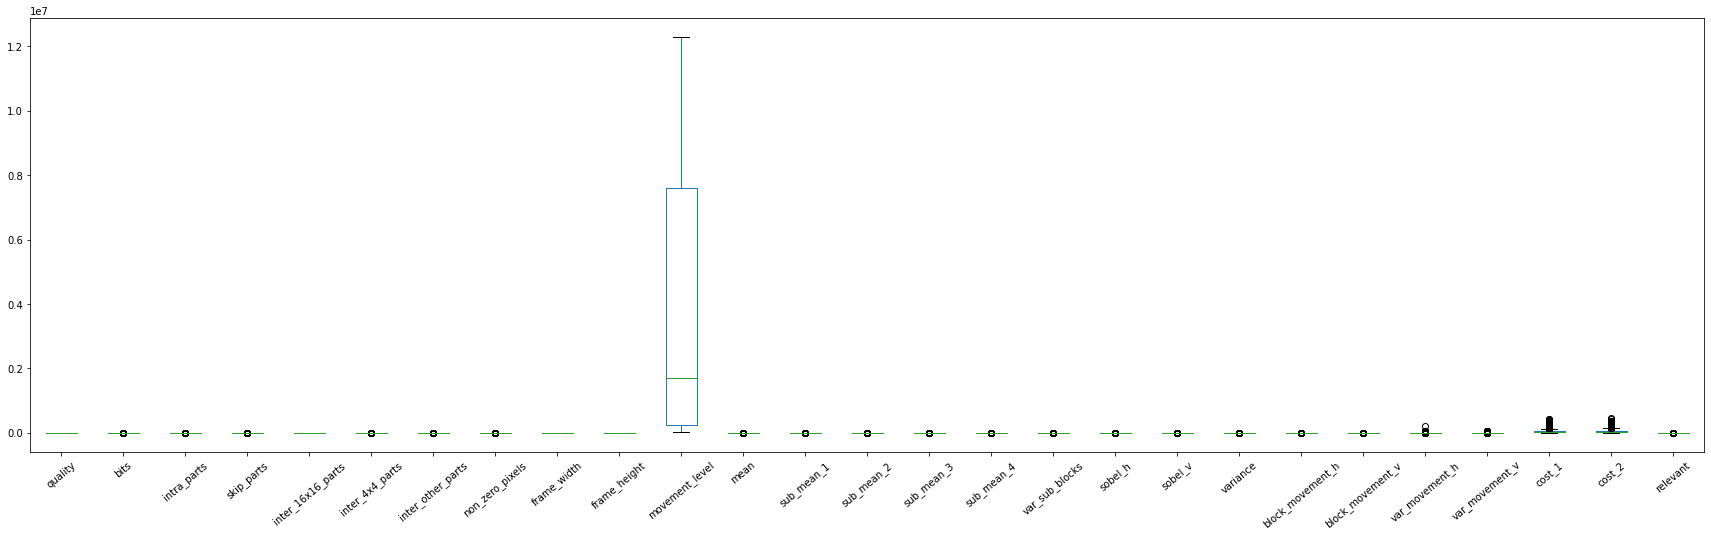

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
f, ax = plt.subplots(1, 1, figsize = (30, 8))
df.plot(kind="box", ax=ax, rot=40)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


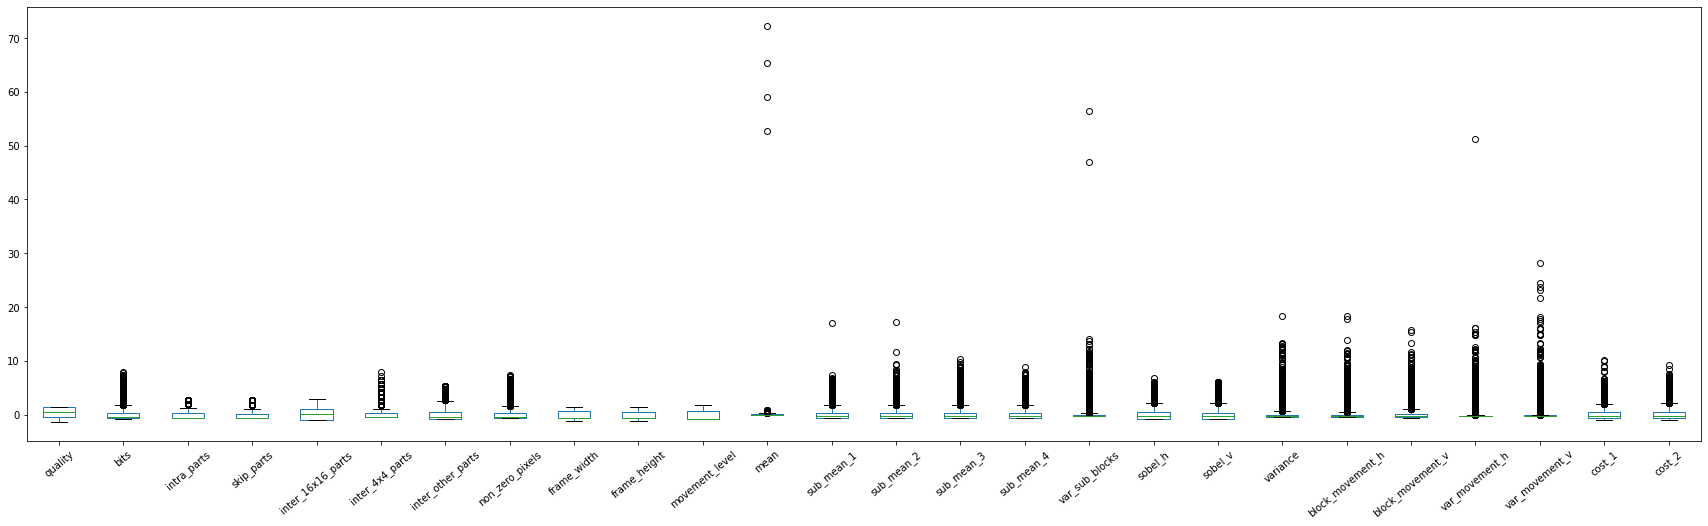

In [ ]:
df_normalized = df[~df.isna().any(axis=1)].reset_index(drop=True) #drop na values for this kind of plot
df_normalized.drop('relevant', axis=1, inplace=True) #we drop the relevant variable because it's binary

#standardize
df_mean = df_normalized.mean()
df_std = df_normalized.std()
df_normalized=(df_normalized-df_mean)/(df_std)

f, ax = plt.subplots(1, 1, figsize = (30, 8))
df_normalized.plot(kind="box", ax=ax, rot=40)
plt.show()


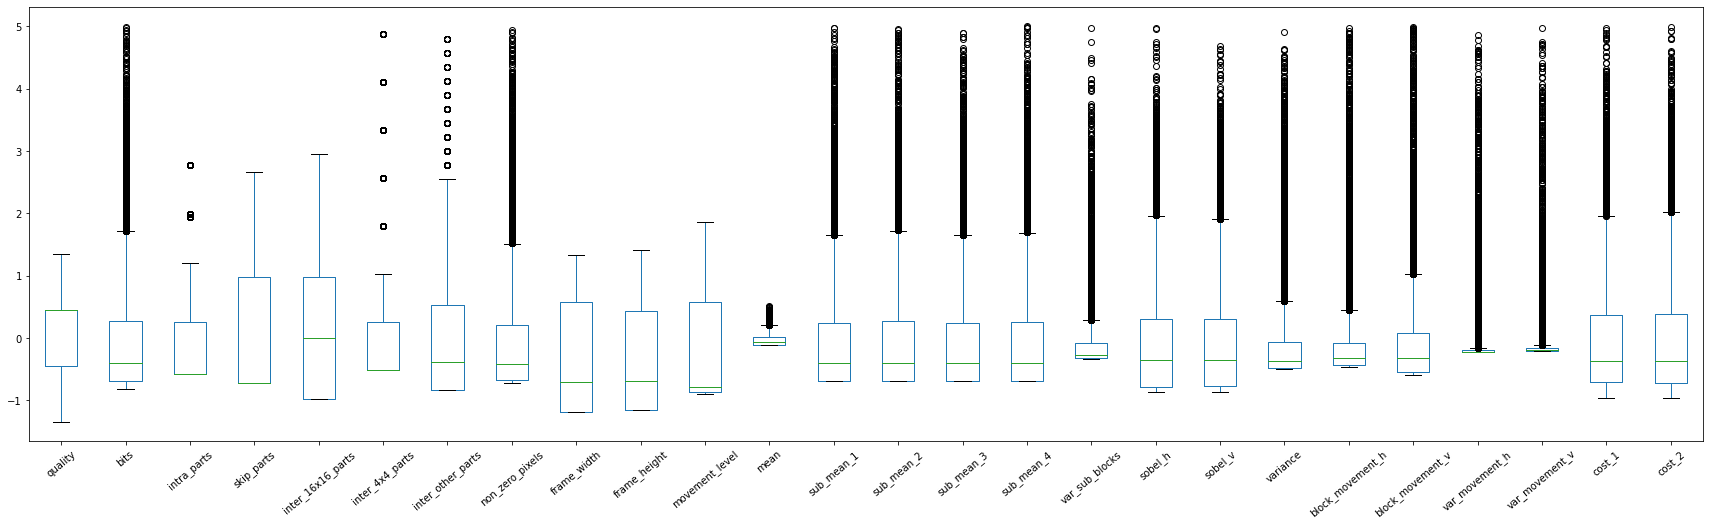

In [ ]:
import scipy as sp
z_scores = sp.stats.zscore(df_normalized)
abs_z_scores = np.abs(z_scores)

df_outliers_dropped = df_normalized[pd.Series((abs_z_scores < 5).sum(axis=1) == 26)]

f, ax = plt.subplots(1, 1, figsize = (30, 8))
df_outliers_dropped.plot(kind="box", ax=ax, rot=40)
plt.show()


In [ ]:
#useful cell to print non-standardized values  
pd.set_option('display.max_rows', None)
minzscore = 1.3
filter = df_outliers_dropped['inter_4x4_parts'] > minzscore


In [ ]:

df_outliers= df_normalized[pd.Series((abs_z_scores > 40).sum(axis=1) > 0)]

df_outliers = (df_outliers*df_std)+df_mean

In [ ]:
df[df['mean'] > 1550]

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
8231,22,568,0,1,0,3,7,77,832,480,318311,1984.875977,4.214844,4.687500,5.410156,5.191406,0.214366,5.468750,4.822266,4.655518,1.65625,4.500000,3.600586,24.562500,36864.0,42232.0,1.0
8232,22,2312,0,0,0,12,18,413,832,480,318311,1795.424805,5.746094,6.601562,5.390625,3.960938,0.908015,12.146484,13.173828,23.408409,4.12500,6.460938,10.859375,26.810974,95076.0,104738.0,1.0
8233,22,1019,0,0,0,0,8,145,832,480,318311,2191.377930,2.558594,2.785156,1.718750,2.449219,0.159518,6.141602,6.196289,6.633536,5.62500,6.125000,19.109375,22.484375,73241.0,85120.0,1.0
8234,22,2423,64,0,0,0,0,432,832,480,318311,1598.834961,11.386719,7.101562,7.367188,9.484375,3.023055,18.430664,27.372070,89.530380,0.00000,0.000000,0.000000,0.000000,91706.0,115599.0,1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


(15250, 26)

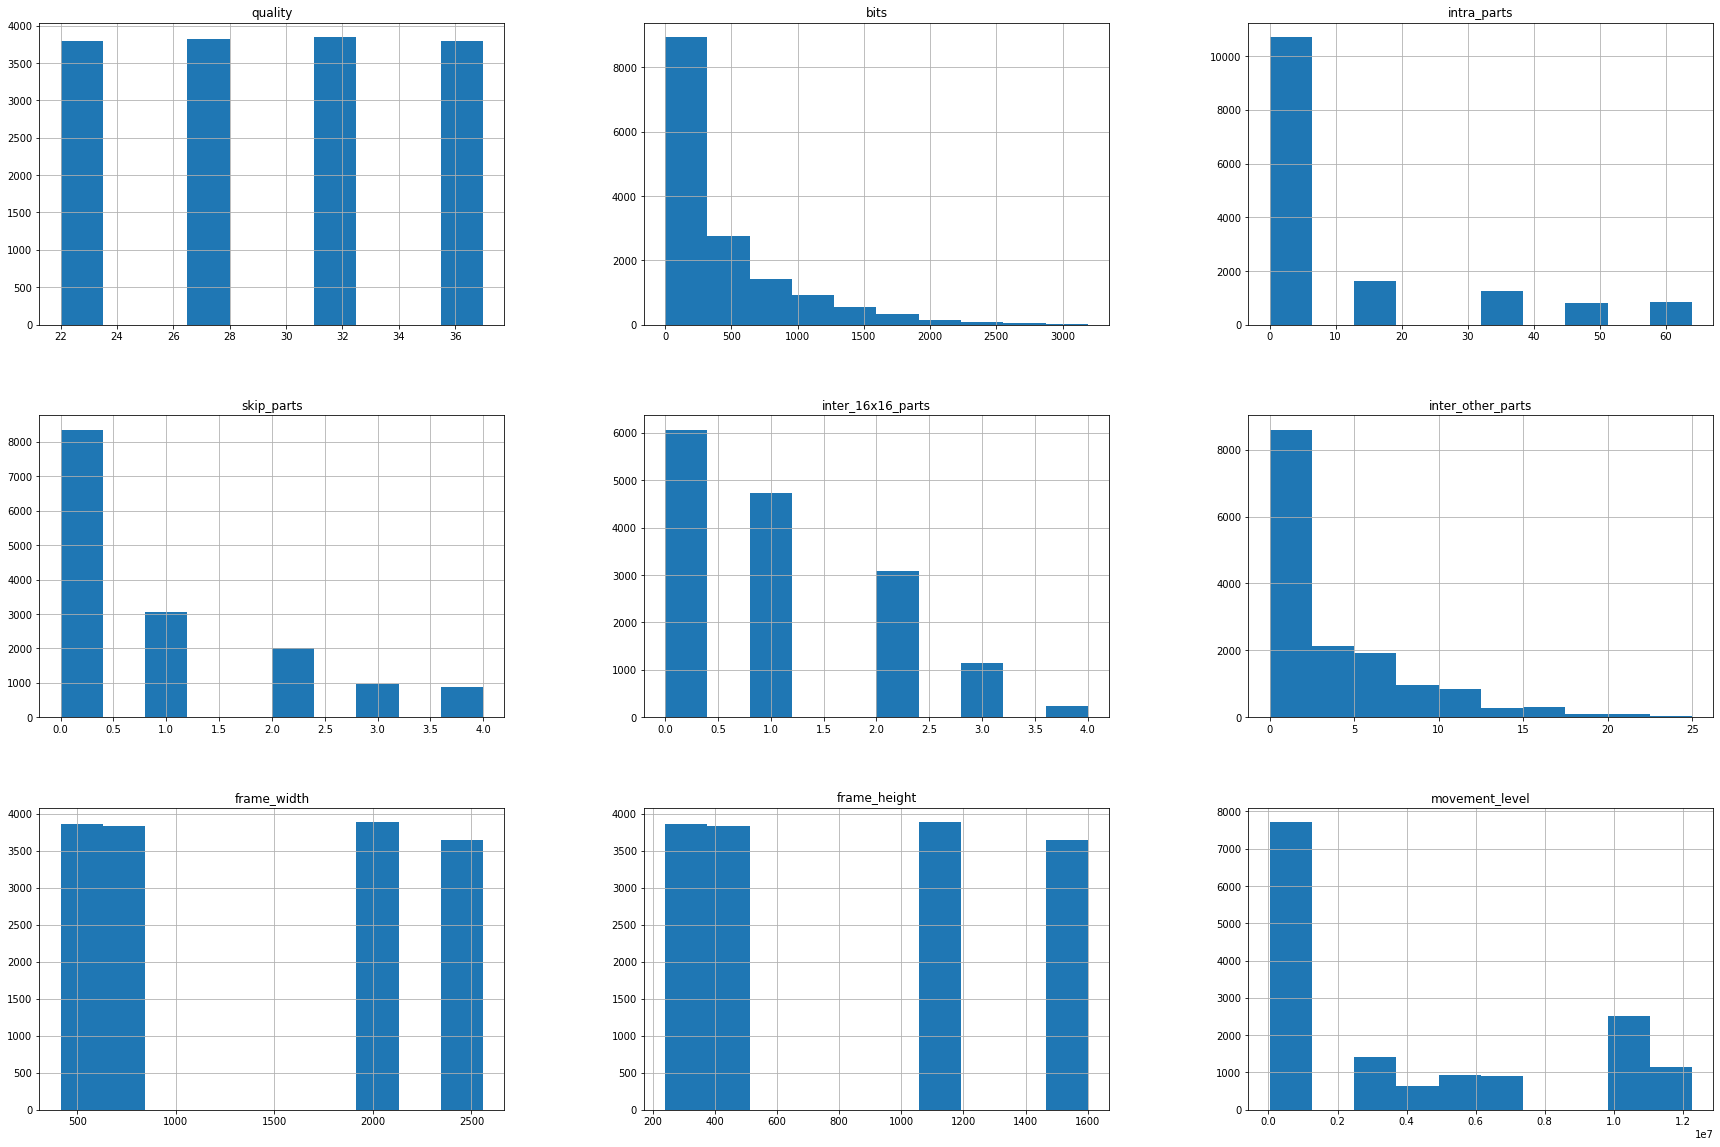

In [ ]:
df_outliers_dropped_rescaled = (df_outliers_dropped*df_std)+df_mean

f, ax = plt.subplots(1, 1, figsize = (30, 20))
hist = df_outliers_dropped_rescaled[['quality', 'bits', 'intra_parts', 'skip_parts','inter_16x16_parts', 'inter_other_parts', 'frame_width', 'frame_height', 'movement_level']].hist(ax=ax)
#hist = df_outliers_dropped_rescaled.hist(ax=ax)
df_outliers_dropped.shape

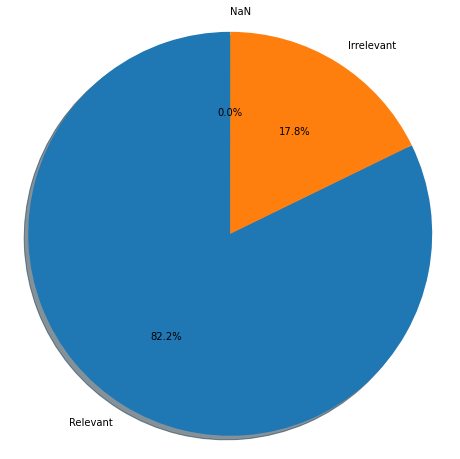

In [ ]:

labels = 'Relevant', 'Irrelevant', 'NaN'

sizes = [(df['relevant']==1).sum(),(df['relevant']==0).sum(),(df['relevant']).isna().sum()]


fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Preprocessing

In [ ]:
print(df.isnull().any())

# Drop rows that don't have a target value.
df = df[df['relevant'].notna()]

# Replace the other NaN values by column mean.
df.fillna(df.mean(), inplace=True)

print(df.isnull().any())

quality              False
bits                 False
intra_parts          False
skip_parts           False
inter_16x16_parts    False
inter_4x4_parts      False
inter_other_parts    False
non_zero_pixels      False
frame_width          False
frame_height         False
movement_level       False
mean                 False
sub_mean_1           False
sub_mean_2           False
sub_mean_3            True
sub_mean_4           False
var_sub_blocks       False
sobel_h              False
sobel_v              False
variance             False
block_movement_h     False
block_movement_v     False
var_movement_h       False
var_movement_v       False
cost_1               False
cost_2                True
relevant              True
dtype: bool
quality              False
bits                 False
intra_parts          False
skip_parts           False
inter_16x16_parts    False
inter_4x4_parts      False
inter_other_parts    False
non_zero_pixels      False
frame_width          False
frame_height    

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
relevance = df.pop('relevant')
relevance.astype(int)
df_preprocessed = df
df.shape

(15998, 26)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed, relevance, test_size=0.2, random_state=42)

We need to deal with the imbalance of target classes in the dataset, where 

*   List item
*   List item

irrelevant datapoints are in a ratios of 4:1 to relevant datapoints. Due to the relativly small dataset, we use oversampling to remove the imbalance in the dataset.

To acurately measure performance, we use the original distribution for testing.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

(unique, counts) = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


[[0.0000e+00 1.0527e+04]
 [1.0000e+00 1.0527e+04]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Training decision tree with hyperparameter optimization

We train a base decision tree with guessed hyperparameters.

In [ ]:
# Train and evaluate base_tree

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 

def evaluate(model, X_test, y_test):
  y_pred = model.predict(X_test)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print('Model performance')
  print('Recall = {:0.4f}'.format(recall))
  print('F1-score = {:0.4f}'.format(f1))
  return recall, f1


from sklearn.tree import DecisionTreeClassifier

base_tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3,
                              max_depth=3, random_state=42)
base_tree.fit(X_train, y_train)
recall_base_tree, f1_base_tree = evaluate(base_tree, X_test, y_test)

Model performance
Recall = 0.5957
F1-score = 0.7299


We use random search to estimate the range of optimal hyperparameters. As scoring function, we use recall_score from sklearn.metrics. This allows us to penalize false negatives, i.e. relevant blocks classified as irrelevant. 

In [ ]:
# Random search training

from sklearn.model_selection import RandomizedSearchCV

random_grid = {'criterion': ['gini','entropy'],
               'splitter': ['best','random'],
               'max_depth': range(1,15),
               'min_samples_split': range(1,15),
               'min_samples_leaf': range(1,5),
               'random_state': [42]}


tree = DecisionTreeClassifier()
random_tree = RandomizedSearchCV(estimator=tree,param_distributions=random_grid,
                                 n_iter=100,cv=3,verbose=2,random_state=42,
                                 n_jobs=-1,scoring='recall')

random_tree.fit(X_train, y_train)

print(random_tree.best_params_)

recall_random_tree, f1_random_tree = evaluate(random_tree.best_estimator_, X_test, y_test)

print('Recall improved by {:0.4f}'.format(recall_random_tree - recall_base_tree))
print('F1 improved by {:0.4f}'.format(f1_random_tree - f1_base_tree))



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 297 out of 300 | elapsed:   23.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   23.6s finished


{'splitter': 'best', 'random_state': 42, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 2, 'criterion': 'gini'}
Model performance
Recall = 0.7512
F1-score = 0.8215
Recall improved by 0.1556
F1 improved by 0.0916


For small variations of found parameters, we perform a systematic grid search for final hyperparameter selection.

In [ ]:
# Grid search with Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini'],
              'splitter': ['best',],
              'max_depth': [11,12,13,14,15],
              'min_samples_split': [2,3,4,5],
              'min_samples_leaf': [1,2],
              'random_state': [42]}

grid_tree = GridSearchCV(estimator=tree,param_grid=param_grid,cv=3,
                         verbose=2,n_jobs=-1,scoring='recall')

grid_tree.fit(X_train, y_train)

print(grid_tree.best_params_)

final_tree = grid_tree.best_estimator_
recall_grid_tree, f1_grid_tree = evaluate(final_tree, X_test, y_test)

print('Recall improved by {:0.4f}'.format(recall_grid_tree - recall_random_tree))
print('F1 improved by {:0.4f}'.format(f1_grid_tree - f1_random_tree))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   19.3s finished


{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Model performance
Recall = 0.7790
F1-score = 0.8322
Recall improved by 0.0278
F1 improved by 0.0106


# Training random forest with hyperparameter optimization

In [ ]:
# ToDo: Implement RandomForest

from sklearn.ensemble import RandomForestClassifier

base_forest = RandomForestClassifier(min_samples_split=5, min_samples_leaf=3,
                               max_depth=3, random_state=42)
base_forest.fit(X_train, y_train)

recall_base_forest, f1_base_forest = evaluate(base_forest, X_test, y_test)

Model performance
Recall = 0.6432
F1-score = 0.7600


We use random search to estimate the range of optimal hyperparameters.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 11)]
max_features = [None, 'sqrt']
max_depth = [i for i in range(1,15)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_state = [42]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'random_state': random_state}
print(random_grid)

# Takes appx. 6 minutes on Google Colab.
forest = RandomForestClassifier()
random_forest = RandomizedSearchCV(estimator=forest,param_distributions=random_grid,
                                 n_iter=25,cv=3,verbose=2,random_state=42,
                                 n_jobs=-1,scoring='recall')

random_forest.fit(X_train, y_train)

print(random_forest.best_params_)

recall_random_forest, f1_random_forest = evaluate(random_forest.best_estimator_, X_test, y_test)

print('Recall improved by {:0.4f}'.format(recall_random_forest - recall_base_forest))
print('F1 improved by {:0.4f}'.format(f1_random_forest - f1_base_forest))


{'n_estimators': [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': [None, 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'random_state': [42]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.8min finished


{'random_state': 42, 'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Model performance
Recall = 0.9137
F1-score = 0.8939
Recall improved by 0.2704
F1 improved by 0.1339


For small variations of found parameters, we perform a systematic grid search for final hyperparameter selection.

In [ ]:
# Grid search with Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = {'random_state': [42],
              'bootstrap': [True],
              'max_depth': [None],
              'max_features': ['sqrt'],
              'min_samples_leaf': [2, 3],
              'min_samples_split': [3, 4, 5],
              'n_estimators': [80,110,140,170]}

# Takes approx. 3 minutes on Google Colab. 
grid_forest = GridSearchCV(estimator=forest,param_grid=param_grid,cv=3,
                         verbose=2,n_jobs=-1,scoring='recall')

grid_forest.fit(X_train, y_train)

print(grid_forest.best_params_)

final_forest = grid_forest.best_estimator_
recall_grid_forest, f1_grid_forest = evaluate(final_forest, X_test, y_test)

print('Recall improved by {:0.4f}'.format(recall_grid_forest - recall_random_forest))
print('F1 improved by {:0.4f}'.format(f1_grid_forest - f1_random_forest))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.9min finished


{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 110, 'random_state': 42}
Model performance
Recall = 0.9220
F1-score = 0.8979
Recall improved by 0.0084
F1 improved by 0.0040


# Final evaluation

In [ ]:
# Confussion matrix for Decision Tree
y_pred_tree = final_tree.predict(X_test)

from sklearn.metrics import confusion_matrix

# 1 => relevant
conf = pd.DataFrame(confusion_matrix(y_test, y_pred_tree),
            columns = ["Predicted 0", "Predicted 1"], 
            index = ["True 0", "True 1"])
conf

,Predicted 0,Predicted 1
True 0,326,245
True 1,581,2048


In [ ]:
# Confusion matrix for Random Forest

y_pred_forest = final_forest.predict(X_test)

conf = pd.DataFrame(confusion_matrix(y_test, y_pred_forest),
            columns = ["Predicted 0", "Predicted 1"], 
            index = ["True 0", "True 1"])
conf

,Predicted 0,Predicted 1
True 0,225,346
True 1,205,2424


In [ ]:
# Accuracy metrics: precision, recall, f1-score, support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.36      0.57      0.44       571
         1.0       0.89      0.78      0.83      2629

    accuracy                           0.74      3200
   macro avg       0.63      0.67      0.64      3200
weighted avg       0.80      0.74      0.76      3200



In [ ]:
# Metrics for Random Forest
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.52      0.39      0.45       571
         1.0       0.88      0.92      0.90      2629

    accuracy                           0.83      3200
   macro avg       0.70      0.66      0.67      3200
weighted avg       0.81      0.83      0.82      3200



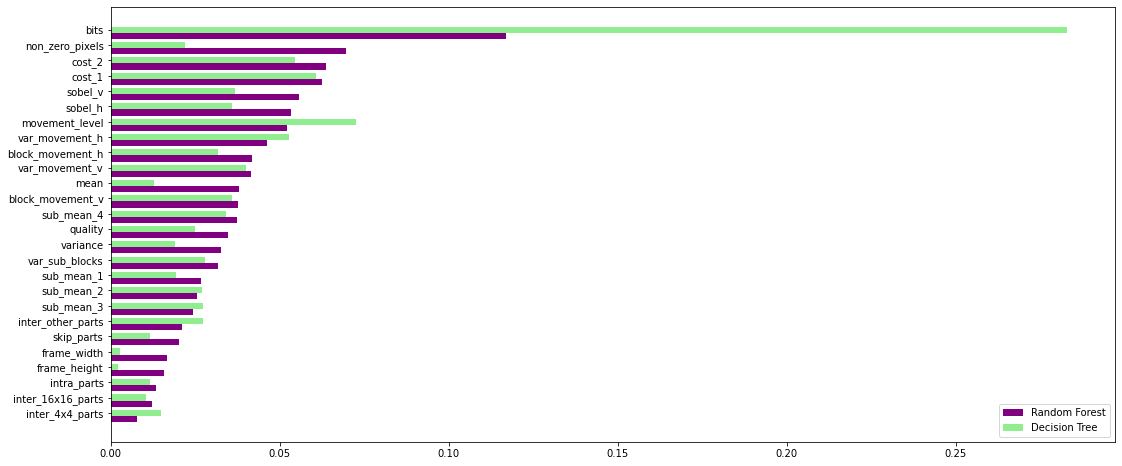

In [ ]:
feature_importance=pd.DataFrame({
    'forest':final_forest.feature_importances_,
    'tree':final_tree.feature_importances_
},index=df_preprocessed.columns)
feature_importance.sort_values(by='forest',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['forest'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['tree'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()